# Reparametrization Trick vs. Score Function Estimator


In [12]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return x ** 2

n_samples = 1000
n_epochs = 50

def score_function_estimator_epoch_variance(method='reinforce'):
    epoch_variances = []
    for _ in range(n_epochs):
        grad_estimates = []
        if method == 'reinforce_with_baseline':
            samples = []
            for _ in range(n_samples):
                x = torch.randn(1, requires_grad=True)
                y = f(x)
                samples.append(y.item())
            baseline = np.mean(samples)  # approximate E[f(z)]
        else:
            baseline = 0  # for simple REINFORCE, baseline is 0

        # Gradient computation
        for _ in range(n_samples):
            x = torch.randn(1, requires_grad=True)
            y = f(x)

            log_prob = -0.5 * x ** 2 - 0.5 * torch.log(torch.tensor(2 * torch.pi))  # log PDF of N(0, 1)
            if method == 'reinforce':
                grad = torch.autograd.grad(outputs=y * log_prob, inputs=x)[0]
            elif method == 'reinforce_with_baseline':
                grad = torch.autograd.grad(outputs=(y - baseline) * log_prob, inputs=x)[0]
            else:
                raise ValueError("Invalid method. Choose 'reinforce' or 'reinforce_with_baseline'.")
            grad_estimates.append(grad.item())
        epoch_variances.append(np.var(grad_estimates))
    return epoch_variances

def reparameterization_epoch_variance():
    epoch_variances = []
    for _ in range(n_epochs):
        grad_estimates = []
        for _ in range(n_samples):
            epsilon = torch.randn(1)
            x = epsilon.requires_grad_() # make x deterministic
            y = f(x)

            grad = torch.autograd.grad(outputs=y, inputs=x)[0]
            grad_estimates.append(grad.item())
        epoch_variances.append(np.var(grad_estimates))
    return epoch_variances

reinforce_variances = score_function_estimator_epoch_variance(method='reinforce')
reinforce_with_learned_baseline_variances = score_function_estimator_epoch_variance(method='reinforce_with_baseline')
reparameterization_variances = reparameterization_epoch_variance()

\

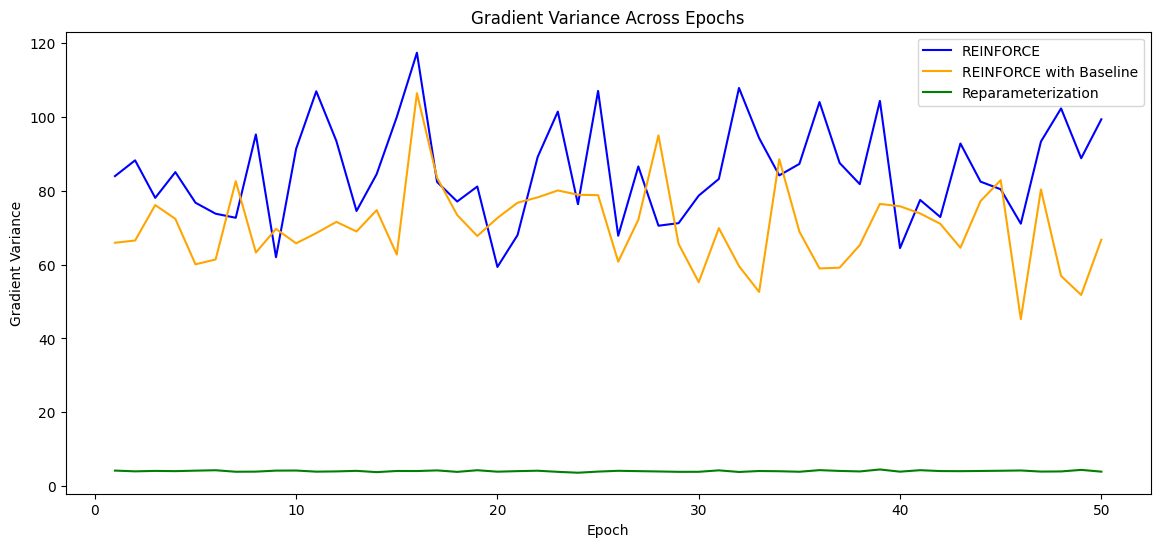

In [19]:
plt.figure(figsize=(14, 6))
plt.plot(range(1, n_epochs + 1), reinforce_variances, label="REINFORCE", color='blue')
plt.plot(range(1, n_epochs + 1), reinforce_with_learned_baseline_variances, label="REINFORCE with Baseline", color='orange')
plt.plot(range(1, n_epochs + 1), reparameterization_variances, label="Reparameterization", color='green')
plt.xlabel("Epoch")
plt.ylabel("Gradient Variance")
plt.title("Gradient Variance Across Epochs")
plt.legend()
plt.show()